# MovieLens Dataset Cleaning and Analysis using Hive and Pig

### Source code and csv output can be found [here](https://github.com/boylaj/ca4022_github)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

## Pig Cleaning

Several cleaning processes needed to be implemented before analysing the dataset. These included:

* Splitting genres into a format that could be queried


* Fixing delimiters between columns. For example, a comma in the title of a movie would result in an extra column being created for that row when loading


* Separating the year from the title so that it may be queried


* Removing null values from the various tables

![alt text](file:///home/jack/Pictures/clean.png)

## Pig Analysis

Once the dataset had been cleaned, we could then perform effective queries.

### What is the title of the movie with the highest number of ratings (top-rated movie)?

In [2]:
pigMostRatedTitles = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/movielens_assignment/results/mostRatedTitles.csv",
    sep = "\t",
    usecols=[i for i in range(1,6)],
    skiprows=1,
    names=["numRatings", "movieID", "title", "year", "genre"]
)
pigMostRatedTitles.head()

,numRatings,movieID,title,year,genre
0,329,356,Forrest Gump,1994.0,"(Comedy,Drama,Romance,War)"
1,317,318,"Shawshank Redemption, The",1994.0,"(Crime,Drama)"
2,307,296,Pulp Fiction,1994.0,"(Comedy,Crime,Drama,Thriller)"
3,279,593,"Silence of the Lambs, The",1991.0,"(Crime,Horror,Thriller)"
4,278,2571,"Matrix, The",1999.0,"(Action,Sci-Fi,Thriller)"


### What titles have mostly 5 star ratings? (over 50% 5 star ratings with more than 5 total ratings)

In [3]:
pigFiveStarMaj = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/movielens_assignment/results/FiveStarMajority.csv",
    sep = "\t",
    usecols=[0,1,3,5,6,7],
    skiprows=1,
    names = ["movieID", "numFiveStarRating", "numRating", "title", "year", "genre"]
)
pigFiveStarMaj

,movieID,numFiveStarRating,numRating,title,year,genre
0,85,4,7,Angels and Insects,1995,"(Drama,Romance)"
1,1041,6,11,Secrets & Lies,1996,(Drama)
2,2239,4,6,Swept Away (Travolti da un insolito destino ne...,1975,"(Comedy,Drama)"
3,3266,4,6,Man Bites Dog (C'est arrivé près de chez vous),1992,"(Comedy,Crime,Drama,Thriller)"
4,3451,6,11,Guess Who's Coming to Dinner,1967,(Drama)
5,170705,4,7,Band of Brothers,2001,"(Action,Drama,War)"


### What is the User with the highest average rating?

In [4]:
pigAvgUserRatings = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/movielens_assignment/results/avgUserRatings.csv",
    sep = "\t"
)
pigAvgUserRatings.head()

,userID,avgRating
0,53,5.000000
1,251,4.869565
2,515,4.846154
3,25,4.807692
4,30,4.735294


### What is the oldest title with an average rating greater than 4?

In [5]:
pigOldestFiveStars = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/movielens_assignment/results/oldestFiveStars.csv",
    sep = "\t",
    usecols=[0,1,3,4,5],
    names=["movieID", "avgRating", "title", "year", "genre"],
    skiprows=1
)
pigOldestFiveStars.head()

,movieID,avgRating,title,year,genre
0,8511,4.500000,"Immigrant, The",1917,(Comedy)
1,3310,4.100000,"Kid, The",1921,"(Comedy,Drama)"
2,71999,4.500000,Aelita: The Queen of Mars (Aelita),1924,"(Action,Adventure,Drama,Fantasy,Romance,Sci-Fi..."
3,3629,4.071429,"Gold Rush, The",1925,"(Adventure,Comedy,Romance)"
4,44931,4.500000,Secrets of a Soul (Geheimnisse einer Seele),1926,(Drama)


### What is the best movie in the "Action"/"War" Category?

In [6]:
pigPopularActionWarMovies = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/movielens_assignment/results/popularActionWarMovies.csv",
    sep = "\t"
)
pigPopularActionWarMovies.head()

,movieID,title,avgRating,numRating
0,1178,Paths of Glory,4.541667,12
1,1217,Ran,4.433333,15
2,86781,Incendies,4.400000,5
3,3153,"7th Voyage of Sinbad, The",4.400000,5
4,85342,Elite Squad: The Enemy Within (Tropa de Elite ...,4.357143,7


## Hive Analysis

### What are the most diverse movies? (most genres per movie)

"Rubber" has **10** genres attributed to it!

In [7]:
mostDiverseMovies = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/hive_analysis/mostDiverseMovies/mostDiverseMovies.csv",
    sep = "\t",
    names = ["title", "genre"]
    
)
mostDiverseMovies.head()

,title,genre
0,Rubber,"(Action,Adventure,Comedy,Crime,Drama,Film-Noir..."
1,Patlabor: The Movie (Kidô keisatsu patorebâ: T...,"(Action,Animation,Crime,Drama,Film-Noir,Myster..."
2,Enchanted,"(Adventure,Animation,Children,Comedy,Fantasy,M..."
3,Who Framed Roger Rabbit?,"(Adventure,Animation,Children,Comedy,Crime,Fan..."
4,Mulan,"(Adventure,Animation,Children,Comedy,Drama,Mus..."


### What is the title of the movie with the highest number of ratings (top-rated movie)?

In [8]:
mostRatedMovies = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/hive_analysis/mostRatedMovies/mostRatedMovies.csv",
    sep = "\t",
    names = ["title", "ratingCount", "avgRating", "bestRating", "worstRating", "genre","year"]
    
)
mostRatedMovies.head()

,title,ratingCount,avgRating,bestRating,worstRating,genre,year
356,Forrest Gump,329,4.164134,5.0,0.5,"(Comedy,Drama,Romance,War)",1994
318,"Shawshank Redemption, The",317,4.429022,5.0,1.0,"(Crime,Drama)",1994
296,Pulp Fiction,307,4.197068,5.0,0.5,"(Comedy,Crime,Drama,Thriller)",1994
593,"Silence of the Lambs, The",279,4.161290,5.0,0.5,"(Crime,Horror,Thriller)",1991
2571,"Matrix, The",278,4.192446,5.0,0.5,"(Action,Sci-Fi,Thriller)",1999


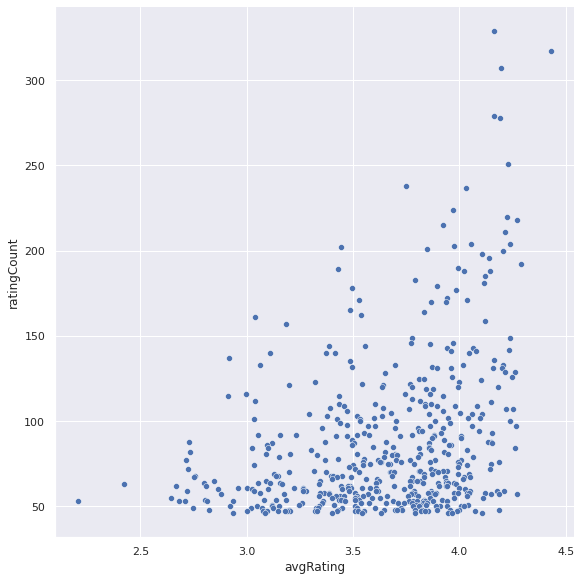

In [9]:
# relation between average rating and rating counts
sns.relplot(data=mostRatedMovies,
           y = "ratingCount",
           x = "avgRating",
           height = 8)

### What is the breakdown of ratings per movie?

In [10]:
ratingBreakdown = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/hive_analysis/ratingBreakdown/ratingBreakdown.csv",
    sep = "\t",
    names = ["title", "5star", "4star", "3star", "2star", "1star","totalRatings"]
    
)
ratingBreakdown

,title,5star,4star,3star,2star,1star,totalRatings
0,Forrest Gump,155,121,42,9,2,329
1,"Shawshank Redemption, The",202,87,24,2,2,317
2,Pulp Fiction,167,89,34,9,8,307
3,"Silence of the Lambs, The",128,111,31,5,4,279
4,"Matrix, The",150,90,24,5,9,278
...,...,...,...,...,...,...,...
9719,13 Tzameti,1,0,0,0,0,1
9720,Return to Sender,0,0,0,1,0,1
9721,"Shootist, The",0,1,0,0,0,1
9722,Dave Chappelle: Deep in the Heart of Texas,0,1,0,0,0,1


### What titles have mostly 5 star ratings? (over 50% 4-5 star ratings with more than 5 total ratings)

In [11]:
#the movies with more than 50% 5stars in order of most 5star ratings
majorityFiveStars = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/hive_analysis/majorityFiveStars/majorityFiveStars.csv",
    sep = "\t",
    names = ["title", "5stars", "4stars", "3stars", "2stars", "1stars", "totalRatings"]
)
majorityFiveStars.head()

,title,5stars,4stars,3stars,2stars,1stars,totalRatings
0,"Shawshank Redemption, The",202,87,24,2,2,317
1,Pulp Fiction,167,89,34,9,8,307
2,"Matrix, The",150,90,24,5,9,278
3,Star Wars: Episode IV - A New Hope,128,92,19,10,2,251
4,Schindler's List,128,60,20,5,7,220


### What is the User with the highest average rating?

In [12]:
# users who give the highest average rating
nicestUsers = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/hive_analysis/nicestUsers/nicestUsers.csv",
    sep = "\t",
    names = ["userID", "numRatings", "avgRating"]
)
nicestUsers

,userID,numRatings,avgRating
0,53,20,5.0
1,251,23,4.869565217391305
2,515,26,4.846153846153846
3,25,26,4.8076923076923075
4,30,34,4.735294117647059
...,...,...,...
606,153,179,2.217877094972067
607,508,24,2.1458333333333335
608,139,194,2.1443298969072164
609,442,20,1.275


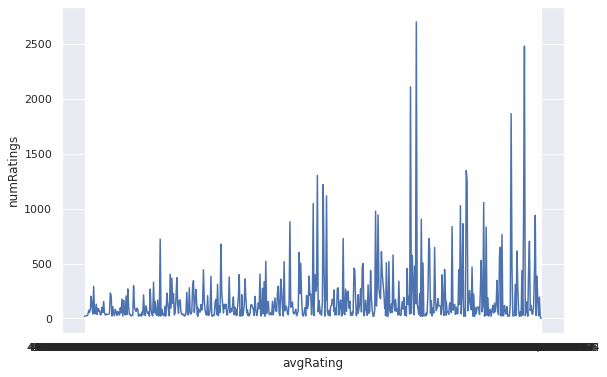

In [13]:
plt.figure(figsize=(9, 6))
plt.plot(nicestUsers.avgRating, nicestUsers.numRatings)
plt.ylabel("numRatings")
plt.xlabel("avgRating")
plt.show()

### Count the number of ratings for each star level (How many 1 star ratings? ... How many 5* ratings?)

In [14]:
# total ratings of each category
totalRatings = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/hive_analysis/totalRatings/totalRatings.csv",
    sep = "\t",
    names = ["5star", "4star", "3star", "2star", "1star"]
)
totalRatings

,5star,4star,3star,2star,1star
0,21762,39954,25597,9342,4181


### How are ratings distributed by genre?

In [15]:
genreBreakdown = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/hive_analysis/genreBreakdown/genreBreakdown.csv",
    sep = "\t",
    names=["genre", "numMoviesInGenre", "AvgGenreRating", "RatingsCount"]
)
genreBreakdown.head()

,genre,numMoviesInGenre,AvgGenreRating,RatingsCount
0,Adventure,1262,3.215230,24161
1,Animation,610,3.497119,6988
2,Children,664,3.107690,9208
3,Comedy,3753,3.181716,39053
4,Fantasy,778,3.218843,11834


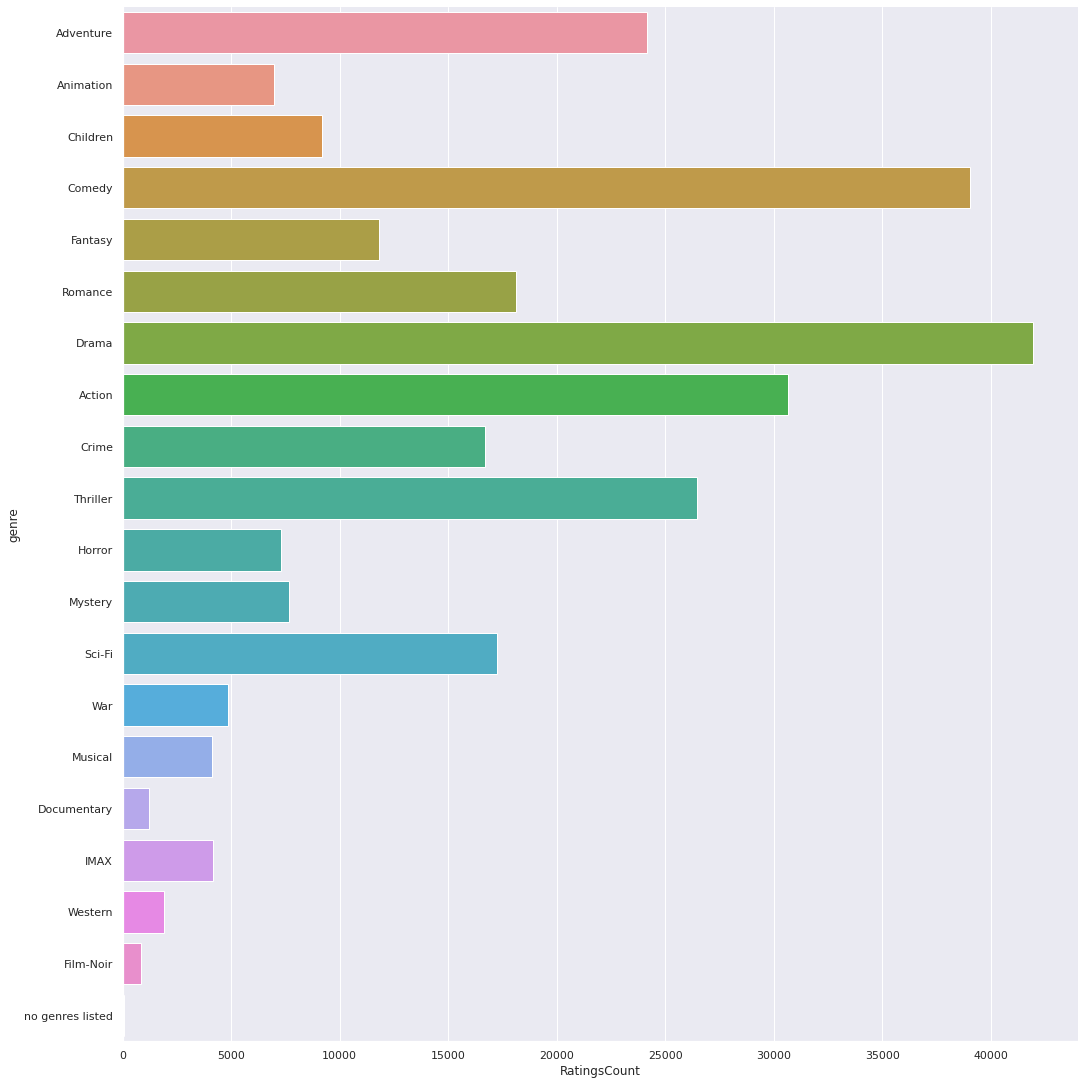

In [16]:
sns.catplot(
    data=genreBreakdown,
    x="RatingsCount",
    y="genre",
    kind="bar",
    height=15
)

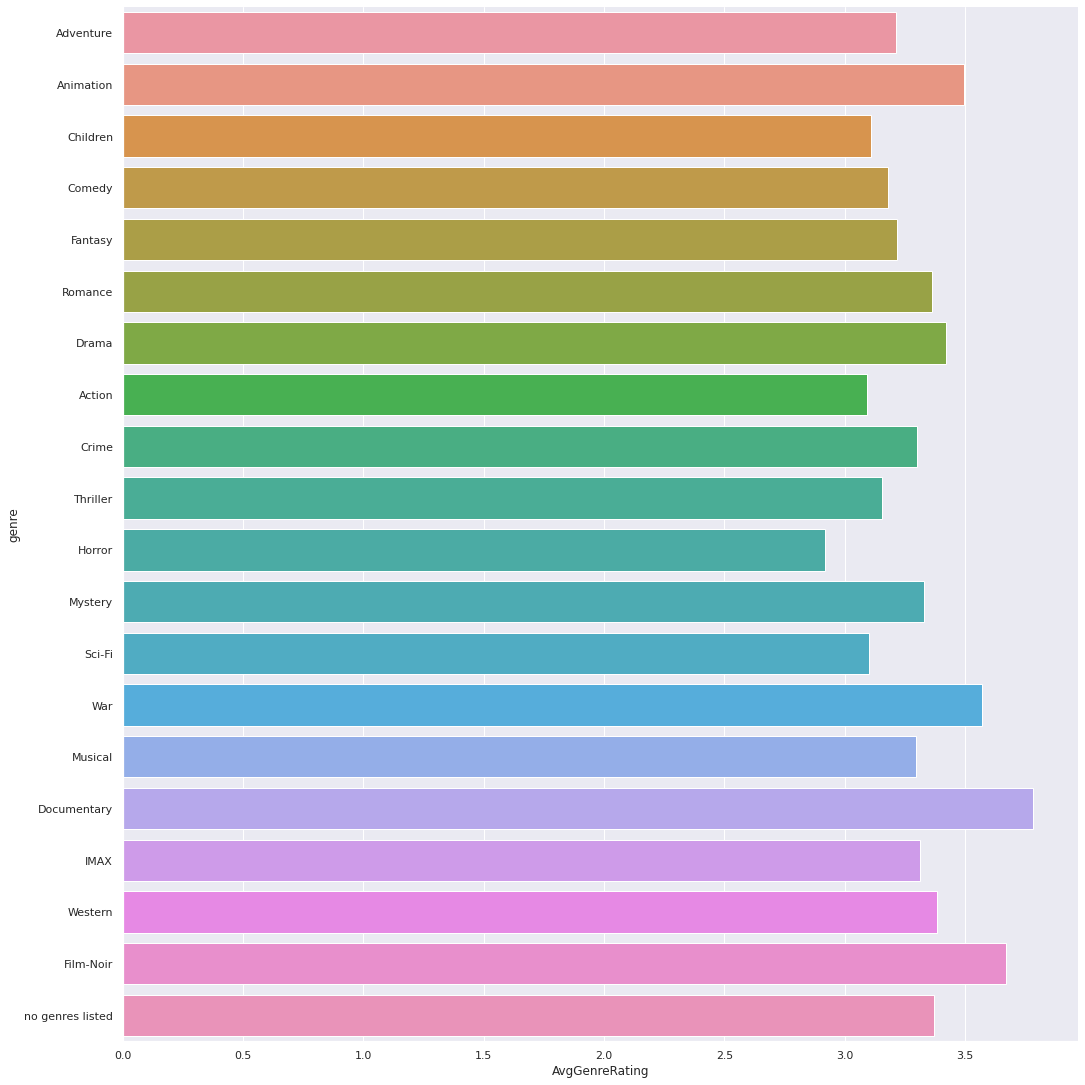

In [17]:
sns.catplot(
    data=genreBreakdown,
    x="AvgGenreRating",
    y="genre",
    kind="bar",
    height=15,
)

In [18]:
dailyRatings = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/hive_analysis/dailyRatings/dailyRatings.csv",
    parse_dates=["date"],
    sep = "\t",
    skiprows=1,
    names=["date", "dayOfWeek", "AvgRating", "RatingsCount"]
)
dailyRatings.head()

,date,dayOfWeek,AvgRating,RatingsCount
0,1996-03-29,Fri,3.982759,58
1,1996-04-12,Fri,4.333333,9
2,1996-04-17,Wed,3.741176,85
3,1996-04-18,Thu,3.867925,53
4,1996-04-23,Tue,3.055556,18


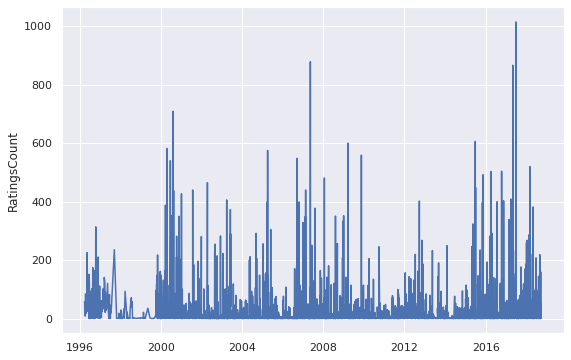

In [19]:
plt.figure(figsize=(9, 6))
plt.plot(dailyRatings.date, dailyRatings.RatingsCount)
plt.ylabel("RatingsCount")
plt.show()

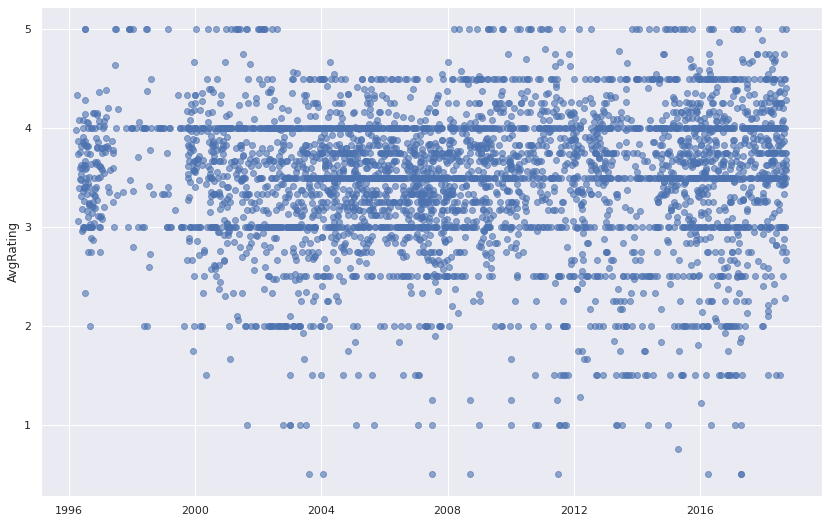

In [20]:
plt.figure(figsize=(14, 9))
plt.scatter(dailyRatings.date, dailyRatings.AvgRating, alpha=0.6)
plt.ylabel("AvgRating")
plt.show()

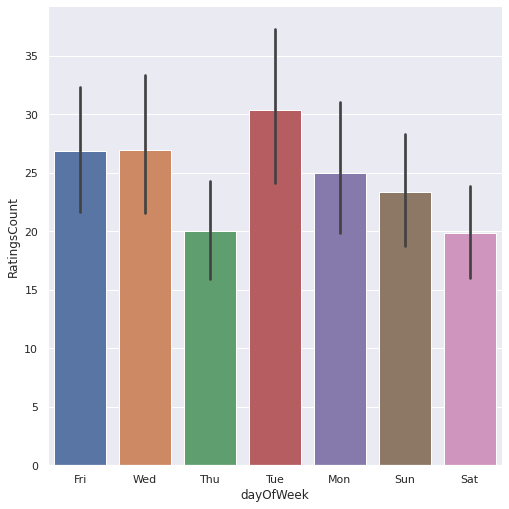

In [21]:
sns.catplot(
    data=dailyRatings,
    x="dayOfWeek",
    y="RatingsCount",
    kind="bar",
    height=7,
)

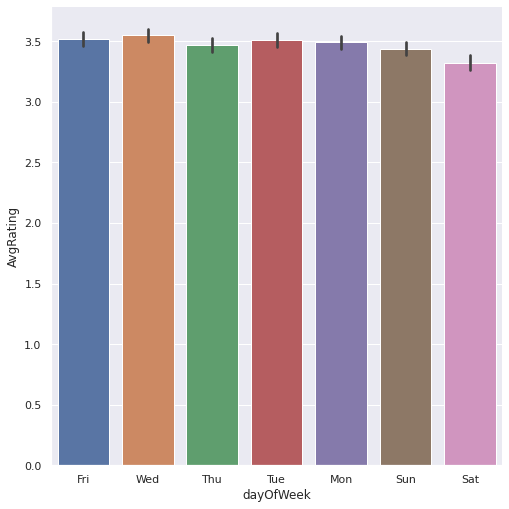

In [22]:
sns.catplot(
    data=dailyRatings,
    x="dayOfWeek",
    y="AvgRating",
    kind="bar",
    height=7,
)

### What were the most controversial movies? (movies with highest variance among ratings)

In [23]:
controversialMovies = pd.read_csv(
    "/home/jack/Desktop/ca4022/output/hive_analysis/controversialMovies/controversialMovies.csv",
    sep = "\t",
    names=["ratingVariance", "title", "movieID"]
)
controversialMovies.head()

,ratingVariance,title,movieID
0,5.0625,Ivan's Childhood (a.k.a. My Name is Ivan) (Iva...,32892
1,5.0625,Fanny and Alexander (Fanny och Alexander),2068
2,4.5000,Troll 2,70946
3,4.0000,Lassie,484
4,4.0000,Emma,84847
